In yesterday's post, I investigated spring systems, inspired by the paper [DiffTaichi](https://arxiv.org/pdf/1910.00935.pdf) which is about differentiable physics simulations and how to control them using neural networks.

Since I'm trying to better understand what this paper is about, the goal of this post is to use their simple example as a starting point. What's nice about their work is that the code is open-sourced. In particular, the simple mass spring example is [here](https://github.com/yuanming-hu/taichi/blob/master/examples/difftaichi/mass_spring_simple.py).

# Defining the problem 

The problem is about three connected springs:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
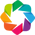

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
   .Labels.I  :Labels   [x,y]   (text)

In [1]:
import numpy as np
import holoviews as hv
hv.extension('bokeh', 'matplotlib')

x = np.array([[0.3, 0.5],
              [0.3, 0.4],
              [0.4, 0.4]])

spring_anchors = np.array([[0, 1],
                           [1, 2],
                           [2, 0]])

def plot_points(x, spring_anchors):
    """Plots all x as 2D points, connected by springs indicated by spring_anchors."""
    lines = []
    for i in range(spring_anchors.shape[0]):
        a, b = spring_anchors[i]
        lines.append(hv.Curve(x[[a, b], :]))
    lines = hv.Overlay(lines)
    scatter = hv.Scatter((x[:, 0], x[:, 1])).opts(hv.opts.Scatter(size=30, padding=0.2))
    labels = hv.Labels({('x', 'y'): x, 'text': [str(n) for n in range(x.shape[0])]}, ['x', 'y'], 'text')
    return scatter * lines * labels

plot_points(x, spring_anchors)

The points have masses and the springs have stiffness as well as spring lengths and follow (damped) Newtonian dynamics (here, I implemented this with numpy and accelerated it using numba). This leads to the following type of behaviour:

In [2]:
import numba 

@numba.jit()
def compute_spring_forces(x, spring_anchors, spring_lengths, spring_stiffnesses):
    """Computes the spring forces."""
    forces = np.zeros_like(x)
    for i in range(spring_anchors.shape[0]):
        a, b = spring_anchors[i]
        x_a, x_b = x[a], x[b]
        dist = x_a - x_b
        length = np.linalg.norm(dist) + 1e-4
        F = (length - spring_lengths[i]) * spring_stiffnesses[i] * dist / length
        forces[a] += -F
        forces[b] += F
    return forces

@numba.jit()
def time_step_integration(x, v, forces, masses, dt, damping):
    """Integrates the forces using semi-implicit Euler time integration with damping."""
    s = np.exp(-dt * damping) 
    v_new = s * v + dt * forces / masses.reshape(-1, 1)
    x_new = x + dt * v_new
    return x_new, v_new

@numba.jit()
def forward(x, spring_anchors, spring_lengths, spring_stiffnesses, steps=1024, dt=0.001, damping=20):
    new_x = x.copy()
    new_v = np.zeros_like(x)
    snapshots = []
    snapshots.append(new_x.copy())
    for t in range(steps):
        forces = compute_spring_forces(new_x, spring_anchors, spring_lengths, spring_stiffnesses)
        new_x, new_v = time_step_integration(new_x, new_v, forces, masses, dt=dt, damping=damping)
        snapshots.append(new_x.copy())
    return snapshots

def make_animation(snapshots, n_frames):
    hmap = hv.HoloMap({i: plot_points(snapshots[i], spring_anchors) for i in range(0, len(snapshots), n_frames)}, 
                      kdims=['snapshot'])
    return hv.output(hmap, holomap='scrubber')

spring_stiffnesses = 10 * np.array([1., 1., 1.])
spring_lengths = np.array([0.15, 0.15, 0.1 * 2 ** 0.5])
masses = np.ones_like(spring_stiffnesses)

snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
make_animation(snapshots, 20)

:HoloMap   [snapshot]
   :Overlay
      .Scatter.I :Scatter   [x]   (y)
      .Curve.I   :Curve   [x]   (y)
      .Curve.II  :Curve   [x]   (y)
      .Curve.III :Curve   [x]   (y)
      .Labels.I  :Labels   [x,y]   (text)

# Setting an objective

The cited paper proposes a way of controlling this simulation. Let's say that our objective is for the triangle constituted by the three points to have a certain area at the end of the simulation and that we can modify the rest lengths of the three simulated springs. How do we accomplish this? 

First of all, we need to define a cost function. Which is the difference between the area and the objective value we want to reach. Knowing the final position of the points, we can easily compute the triangle area: 

In [3]:
@numba.jit()
def triangle_area(x):
    x01 = x[0] - x[1]
    x02 = x[0] - x[2]
    # Triangle area from cross product
    area = np.abs(0.5 * (x01[0] * x02[1] - x01[1] * x02[0]))
    return area

@numba.jit()
def cost_function(x):
    """Difference between area and target area of triangle, squared."""
    target_area = 0.2
    area = triangle_area(x)
    return np.square(area - target_area) 

triangle_area(snapshots[0]), triangle_area(snapshots[-1])

(0.005000000000000001, 0.008243853015880287)

We can use the cost function to evaluate the last configuration in our first simulation:

In [4]:
print(f'sanity check: {(triangle_area(snapshots[-1]) - 0.2)**2}, cost function: {cost_function(snapshots[-1])}')

sanity check: 0.036770419906195326, cost function: 0.036770419906195326


# Gradient descent 

Now, how do we improve the state of things? A simple way to proceed is to do gradient descent. The gradient of our cost function depends on the three rest length parameters of our triangle. We can use finite differences to approximately compute this gradient. Intuitively, this means putting a number on: if I increase the rest length of spring 1 by a little, how much is the cost going to change?

We can do this by changing the spring length of the first spring by just a little bit and see how the cost changes.

In [5]:
spring_lengths = np.array([0.1, 0.1, 0.1 * 2 ** 0.5])
snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
cost0 = cost_function(snapshots[-1])
spring_lengths[0] += 0.001
snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
cost1 = cost_function(snapshots[-1])
print(f'initial cost {cost0:.5f}, after changing first rest length {cost1:.5f}')
print(f'gradient d cost / d rest_length approx. {(cost1 - cost0)/0.001:.4e}')

initial cost 0.03803, after changing first rest length 0.03802
gradient d cost / d rest_length approx. -1.1613e-02


We can automate this method to compute this for all three spring lengths.

In [6]:
@numba.jit()
def compute_approximate_gradient(x, spring_lengths, dl=0.001):
    gradient = np.zeros_like(spring_lengths)
    # starting point
    snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
    ref_cost = cost_function(snapshots[-1])

    for rest_length_i in range(3):
        spring_lengths[rest_length_i] += dl
        snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
        cost1 = cost_function(snapshots[-1])
        gradient[rest_length_i] = (cost1 - ref_cost)/dl
    
    return gradient

approx_grad = compute_approximate_gradient(x, np.array([0.1, 0.1, 0.1 * 2 ** 0.5]))
approx_grad

array([-0.01161341, -0.02329161, -0.02888142])

If you're familiar with gradients, you know that making a small step in the direction of the negative gradient will yield a lower cost.

In [7]:
spring_lengths = np.array([0.1, 0.1, 0.1 * 2 ** 0.5])
learning_rate = 0.01
spring_lengths += -learning_rate * approx_grad

spring_lengths

array([0.10011613, 0.10023292, 0.14171017])

Let's see if the cost is lower (as we expect).

In [8]:
snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
print(f'cost before {cost0:.5e}, cost after: {cost_function(snapshots[-1]):.5e}')

cost before 3.80279e-02, cost after: 3.80222e-02


Now we can just iterate this procedure. Hopefully, the cost will just go down. We try to stop when reaching a given error level.

In [9]:
spring_lengths = np.array([0.1, 0.1, 0.1 * 2 ** 0.5])
learning_rate = 0.0001
costs = []
for iters in range(1000):
    approx_grad = compute_approximate_gradient(x, spring_lengths)
    spring_lengths += -learning_rate * approx_grad
    snapshots = forward(x, spring_anchors, spring_lengths, spring_stiffnesses)
    cost = cost_function(snapshots[-1])
    costs.append(cost)
    if iters % 20 == 0:
        print(f'iter {iters}: cost {cost:.5e} abs(grad).max(): {np.abs(approx_grad).max()}')
    if cost < 1e-3:
        learning_rate /= 20
    elif cost < 1e-4:
        learning_rate /= 20
    if cost < 1e-6:
        break

iter 0: cost 3.79989e-02 abs(grad).max(): 0.028881420714124695
iter 20: cost 3.73775e-02 abs(grad).max(): 0.032907591919373314
iter 40: cost 3.66764e-02 abs(grad).max(): 0.036820428564642016
iter 60: cost 3.58980e-02 abs(grad).max(): 0.04060547434433376
iter 80: cost 3.50449e-02 abs(grad).max(): 0.04424828076796117
iter 100: cost 3.41202e-02 abs(grad).max(): 0.04773435699673839
iter 120: cost 3.31271e-02 abs(grad).max(): 0.05104915860242032
iter 140: cost 3.20692e-02 abs(grad).max(): 0.05417809002744578
iter 160: cost 3.09503e-02 abs(grad).max(): 0.057106511473857535
iter 180: cost 2.97747e-02 abs(grad).max(): 0.05981974681625729
iter 200: cost 2.85467e-02 abs(grad).max(): 0.06230309135549575
iter 220: cost 2.72713e-02 abs(grad).max(): 0.06454181908291737
iter 240: cost 2.59534e-02 abs(grad).max(): 0.06652118943992896
iter 260: cost 2.45985e-02 abs(grad).max(): 0.06822645366166141
iter 280: cost 2.32121e-02 abs(grad).max(): 0.06964286081604515
iter 300: cost 2.18004e-02 abs(grad).max()

How does cost decrease if we plot it?

In [10]:
hv.Curve(costs).redim.label(x='iterations', y='cost function') 

:Curve   [x]   (y)

Let's look at the final simulation:

In [11]:
make_animation(snapshots, n_frames=20)

:HoloMap   [snapshot]
   :Overlay
      .Scatter.I :Scatter   [x]   (y)
      .Curve.I   :Curve   [x]   (y)
      .Curve.II  :Curve   [x]   (y)
      .Curve.III :Curve   [x]   (y)
      .Labels.I  :Labels   [x,y]   (text)

Let's check if we've reached the objective and what the rest lengths are now.

In [12]:
triangle_area(snapshots[-1])

0.19927232110562043

Indeed this works: we have reached a triangle area of 0.2.

In [13]:
spring_lengths

array([0.81642608, 0.81785103, 0.86011158])

As a side note, these are not the lengths we expected to find, since the paper mentions [0.600, 0.600, 0.529]. Still, the solution is quite close.

Now, the next question would be: what does it mean for the simulation to be differentiable at every timestep? And how does the neural network control this simulation as described in the paper?

*This post was entirely written using the Jupyter Notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20191030_SpringOptimalControl.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20191030_SpringOptimalControl.ipynb).*